<a href="https://colab.research.google.com/github/Md-jaber-hossain/Deep-learning-based-approach-for-recognition-and-classification-of-papaya-leaf-diseases/blob/main/The_Code_of_MobileNet_Model_of_CNN_Algorithm_for_Papaya_Leaf_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Re-size all the images
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/train'
test_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/test'
valid_path = '/content/drive/MyDrive/papaya-leaf-disease-dataset/validation'

In [ ]:
# Number of output classes
folders = glob('/content/drive/MyDrive/papaya-leaf-disease-dataset/train/*')
print ('total class: ', len(folders))##my add

total class:  5


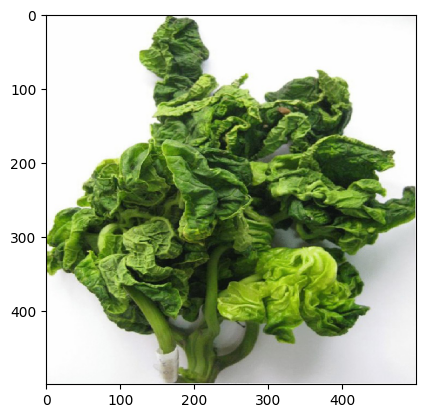

In [ ]:
img = image.load_img('/content/drive/MyDrive/papaya-leaf-disease-dataset/train/leaf curl/curl-1.jpg' , target_size=(500, 500))
plt.imshow(img)

In [ ]:

mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

x = mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in mobilenet.layers:
    layer.trainable = False

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

In [ ]:
# View the structure of MobileNet model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.4 )


In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5503 images belonging to 5 classes.


In [ ]:
valid_set = train_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 651 images belonging to 5 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 350 images belonging to 5 classes.


In [ ]:
x,y = test_set.next()
x.shape

(1, 224, 224, 3)

In [ ]:
# Fit the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/20
172/172 [==============================] - 1083s 6s/step - loss: 0.0875 - accuracy: 0.9689 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 2/20
172/172 [==============================] - 428s 2s/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 5.6771e-04 - val_accuracy: 1.0000
Epoch 3/20
172/172 [==============================] - 434s 3s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 4/20
172/172 [==============================] - 438s 3s/step - loss: 3.5617e-04 - accuracy: 1.0000 - val_loss: 8.0051e-05 - val_accuracy: 1.0000
Epoch 5/20
172/172 [==============================] - 430s 2s/step - loss: 1.2679e-04 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 6/20
172/172 [==============================] - 445s 3s/step - loss: 1.1371e-04 - accuracy: 1.0000 - val_loss: 7.3852e-06 - val_accuracy: 1.0000
Epoch 7/20
172/172 [==============================] - 428s 2s/step - loss: 7.4116e-05 - accuracy: 1.0000 - val_loss: 

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

350/350 - 50s - loss: 0.1469 - accuracy: 0.9886 - 50s/epoch - 144ms/step

Test accuracy: 0.9885714054107666


In [ ]:
model.save('/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf-mobilenet.h5')

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

350/350 - 29s - loss: 0.1616 - accuracy: 0.9829 - 29s/epoch - 83ms/step

Test accuracy: 0.9828571677207947


In [ ]:
nb_samples = len(test_set)
print(nb_samples)

350


1/1 [==============================] - 0s 70ms/step


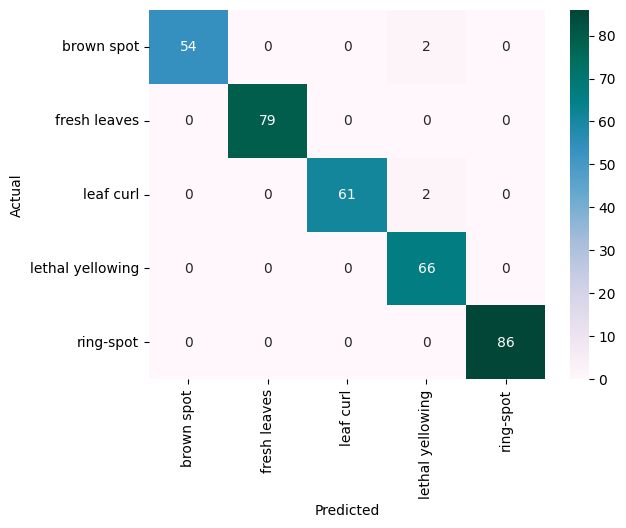

test accuracy : 98.85714285714286


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/papaya-leaf-disease-dataset/papaya-leaf-mobilenet.h5")
filenames = test_set.filenames
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='PuBuGn', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
from sklearn.metrics import classification_report
class_label=list(test_set.class_indices.keys())
print(classification_report(actual_class, predicted_class,target_names=class_label))

                  precision    recall  f1-score   support

      brown spot       1.00      0.96      0.98        56
    fresh leaves       1.00      1.00      1.00        79
       leaf curl       1.00      0.97      0.98        63
lethal yellowing       0.94      1.00      0.97        66
       ring-spot       1.00      1.00      1.00        86

        accuracy                           0.99       350
       macro avg       0.99      0.99      0.99       350
    weighted avg       0.99      0.99      0.99       350



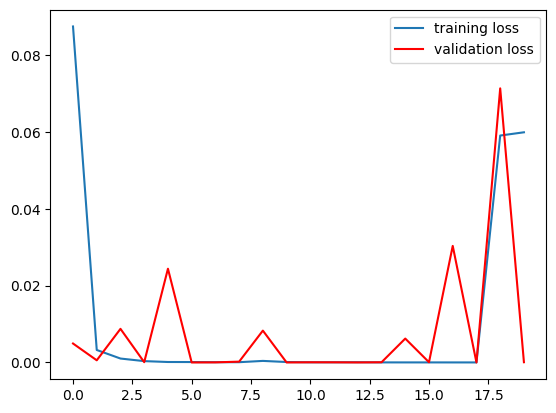

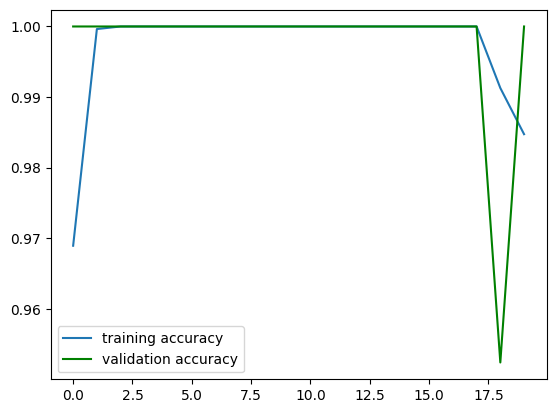

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation loss', color='red')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(r.history['accuracy'], label='training accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy', color='green')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')